# Keras를 이용한 손글씨 인식 딥러닝
- Tensorflow로 작성된 프로그램은 sklearn Library를 사용할 때 보다 어렵다.
- Keras는 머신러닝 라이브러리 테아노(Theano)와 Tensorflow를 Wrapping한 라이브러리

In [18]:
import pandas as pd
train = pd.read_csv("../Data/train_20k.csv",header=None)
test = pd.read_csv("../Data/test_1k.csv",header=None)

print(train.head())
print(test.head())
print(train.count())

   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0    5    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    4    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    1    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    9    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   779  780  781  782  783  784  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 785 columns]
   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0    7    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    2    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    1    0    0    0    0    0    0    0    0    0

---
### Preprocessing(전처리)

In [21]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.isnull().sum().sum()

0

In [5]:
test.isnull().sum().sum()

0

In [6]:
train.shape

(20001, 785)

In [7]:
# train과 test를 Feature와 Target으로 분리하고 정규화하기 
train_label = train.iloc[:,0]
train_data = train.iloc[:,1:]


test_label = test.iloc[:,0]
test_data = test.iloc[:,1:]

In [9]:
test_label.shape

(1001,)

In [16]:
train_scaled = train_data/ 255
test_scaled = test_data/ 255


In [23]:
print(train_label[0:5])
print(train_data[0:5])

0    5
1    0
2    4
3    1
4    9
Name: 0, dtype: int64
   1    2    3    4    5    6    7    8    9    10   ...  775  776  777  778  \
0    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   779  780  781  782  783  784  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 784 columns]


### Deep Learning Model 만들기

In [60]:
# GPU 사용 설정
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [61]:
from tensorflow import keras

In [62]:
train_scaled.shape

(20001, 784)

In [63]:
model = keras.Sequential()
model.add(keras.layers.Dense(512, activation= 'relu',input_shape= (784,)))
model.add(keras.layers.Dense(10, activation = 'softmax'))


In [64]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [65]:
train_scaled.shape

(20001, 784)

In [66]:
train_label.shape

(20001,)

In [67]:
train_label

0        5
1        0
2        4
3        1
4        9
        ..
19996    5
19997    1
19998    4
19999    2
20000    5
Name: 0, Length: 20001, dtype: int64

In [72]:
import numpy as np
model.fit(np.array(train_scaled), np.array(train_label), epochs=30)

Epoch 1/30
626/626 [==============================] - 2s 3ms/step - loss: 3.6059e-09 - accuracy: 1.0000
Epoch 2/30
626/626 [==============================] - 2s 3ms/step - loss: 3.4211e-09 - accuracy: 1.0000
Epoch 3/30
626/626 [==============================] - 2s 3ms/step - loss: 3.4807e-09 - accuracy: 1.0000
Epoch 4/30
626/626 [==============================] - 2s 3ms/step - loss: 3.2841e-09 - accuracy: 1.0000
Epoch 5/30
626/626 [==============================] - 2s 3ms/step - loss: 3.3019e-09 - accuracy: 1.0000
Epoch 6/30
626/626 [==============================] - 2s 3ms/step - loss: 3.2364e-09 - accuracy: 1.0000
Epoch 7/30
626/626 [==============================] - 2s 3ms/step - loss: 3.2721e-09 - accuracy: 1.0000
Epoch 8/30
626/626 [==============================] - 2s 3ms/step - loss: 3.2423e-09 - accuracy: 1.0000
Epoch 9/30
626/626 [==============================] - 2s 3ms/step - loss: 3.1946e-09 - accuracy: 1.0000
Epoch 10/30
626/626 [==============================] - 2s 3ms/st

---
### 테스트 데이터로 평가하기

In [73]:
score = model.evaluate(test_data,np.array(test_label))

print('loss',score[0])
print('accuracy',score[1])

32/32 [==============================] - 0s 2ms/step - loss: 48.2369 - accuracy: 0.9750
loss 48.23685836791992
accuracy 0.9750249981880188


---
### test_data로 predict해보기

In [80]:
pred = model.predict(test_data)
print("test label", test_label[:10])
print("pred :",np.argmax(pred[:10], axis=1)) ## np.argmax 제일 값의 인덱스 반환

32/32 [==============================] - 0s 3ms/step
test label 0    7
1    2
2    1
3    0
4    4
5    1
6    4
7    9
8    5
9    9
Name: 0, dtype: int64
pred : [7 2 1 0 4 1 4 9 6 9]


In [85]:
np.argmax(np.array([1,4,3,2]))

1

---
# 번외 : Image 만들기

In [86]:
from PIL import Image

In [88]:
# 0번의 정답을 제외한 데이터 만들기
train1 = train.loc[:, train.columns != 0]
train1.shape

(20001, 784)

In [90]:
# train_data의 50번의 크기 조절하기
abc = np.array(train1.iloc[50]).reshape(28,28)
abc.shape

(28, 28)

In [92]:
# Image 만들기
image = Image.fromarray(abc.astype(np.uint8))
image

In [93]:
# image 저장하기
image.save('../Data/mnist_test3.jpg','jpeg')

----
# 이미지를 불러서 Predict 해보기

In [94]:
# Image 불러오기
img = Image.open("../Data/mnist_test3.jpg")
img

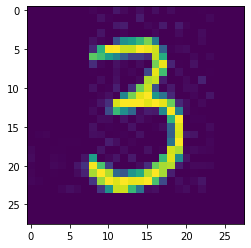

In [95]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()




In [96]:
# image를 numpy 배열로 변환
imgArray = np.array(img)
imgArray = imgArray / 255 
imgArray.shape

(28, 28)

In [99]:
# image를 1차원 배열로 변환
imgArray2 = imgArray.reshape(-1)
imgArray2.shape

(784,)

In [100]:
imgArray3 = imgArray2.tolist()

In [102]:
dfArray = pd.DataFrame(imgArray3)
dfArray = dfArray.T

In [103]:
dfArray

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011765,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
print("예측값 :", np.argmax(model.predict(dfArray),axis=1))

1/1 [==============================] - 0s 68ms/step
예측값 : [3]


In [105]:
model.predict(dfArray)

1/1 [==============================] - 0s 23ms/step


array([[1.2284370e-21, 1.1181070e-15, 5.7656712e-17, 1.0000000e+00,
        3.0490297e-28, 1.1335020e-13, 1.4346711e-29, 1.8756630e-25,
        1.7377739e-22, 2.7126984e-15]], dtype=float32)